Index(['ID', 'Topic', 'Sentiment', 'Text'], dtype='object')


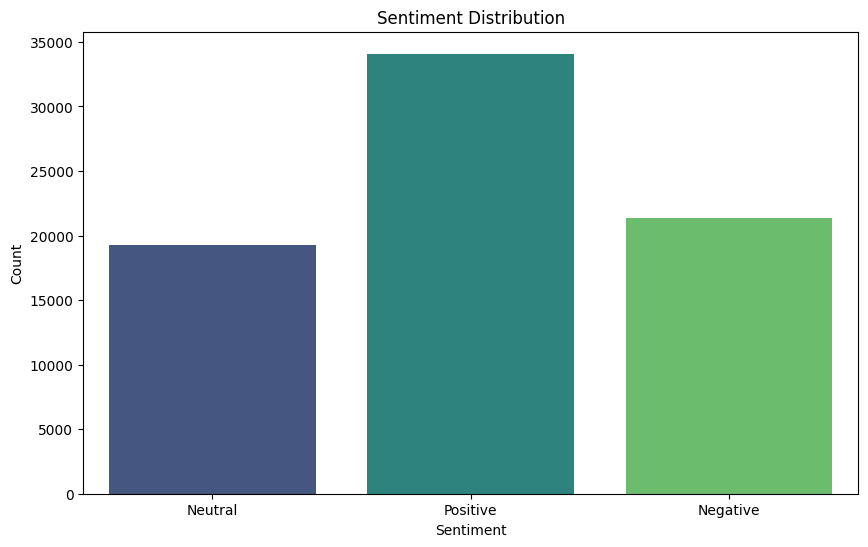

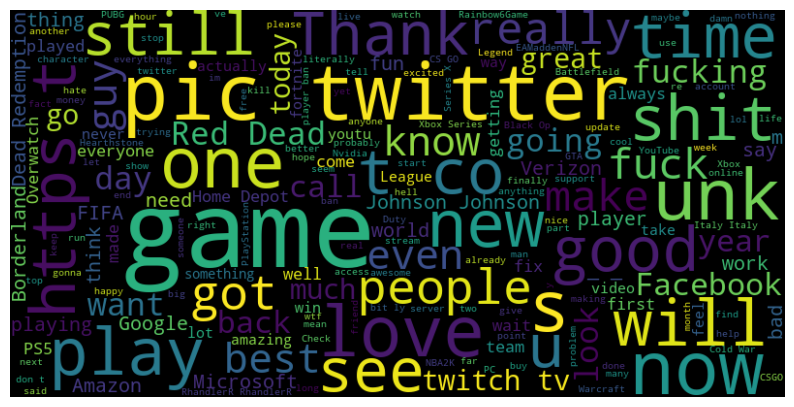

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud

# Read data from CSV without header names
df = pd.read_csv('twitter.csv', header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])

# Display column names to verify the correctness
print(df.columns)

# Check for the correct column name or adjust it accordingly
text_column_name = 'Text'  # Update this variable with the correct column name

# Convert 'Text' column to strings
df[text_column_name] = df[text_column_name].astype(str)

# Sentiment analysis using TextBlob
df['Polarity'] = df[text_column_name].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Visualization using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud
text = ' '.join(df[text_column_name])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
